### Required packages for this analysis

In [13]:
from matplotlib import pyplot as plt
import json
from datetime import datetime as dt
import seaborn

### Read in the datasets
I downloaded this data using Facebook's account download options at.

In [14]:
with open(r'D:\EMAT_22110\FB Data Silva\facebook-davidsilva100046_toshare\ads_and_businesses\advertisers_who_uploaded_a_contact_list_with_your_information.json') as cl:
    contactlists = json.load(cl)

In [15]:
with open(r'D:\EMAT_22110\FB Data Silva\facebook-davidsilva100046_toshare\posts\your_posts_1.json') as p:
    posts = json.load(p)

In [16]:
type(contactlists)

dict

In [17]:
contactlists.keys()

dict_keys(['custom_audiences'])

In [18]:
len(contactlists['custom_audiences'])

2970

In [19]:
namelengths = [len(x) for x in contactlists['custom_audiences']]
namelengths[:10]

[17, 14, 15, 9, 14, 10, 19, 17, 8, 13]

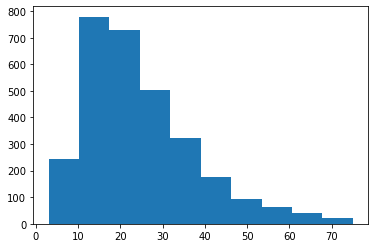

In [20]:
namelengthhist = plt.hist(namelengths)

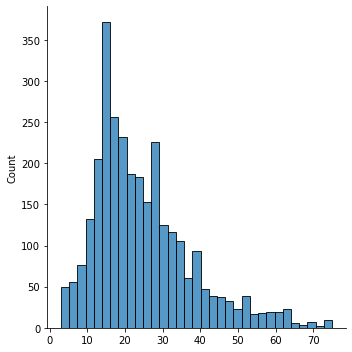

In [21]:
namelengthdist = seaborn.displot(namelengths)

In [22]:
type(posts)

list

In [27]:
type(posts[0:1][0])

dict

In [29]:
posts[0].keys()

dict_keys(['timestamp', 'attachments', 'data'])

In [30]:
len(posts)

536

In [32]:
posts[0]['timestamp']

1562008506

In [33]:
a_date = dt.utcfromtimestamp(posts[0]['timestamp'])
a_date

datetime.datetime(2019, 7, 1, 19, 15, 6)

In [34]:
a_date.month, a_date.year, a_date.day

(7, 2019, 1)

In [35]:
posts[0]

{'timestamp': 1562008506,
 'attachments': [{'data': [{'media': {'uri': 'photos_and_videos/TimelinePhotos_TaimeUdi3Q/65425624_10218800709066141_8812704912031875072_o_10218800709026140.jpg',
      'creation_timestamp': 1562008366,
      'media_metadata': {'photo_metadata': {'camera_make': 'Google',
        'camera_model': 'Pixel 3',
        'taken_timestamp': 1561983686,
        'modified_timestamp': 1562008100,
        'exposure': '33363/1000000',
        'focal_length': '4440/1000',
        'f_stop': '180/100',
        'iso_speed': 73,
        'latitude': 41.148383333333,
        'longitude': -81.346986111111,
        'orientation': 1,
        'original_width': 2849,
        'upload_ip': '131.123.49.82'}},
      'title': 'Timeline Photos',
      'description': 'This is just too surreal, exciting, mind boggling, crazy. 201J Taylor Hall at Kent State.'}}]}],
 'data': [{'post': 'This is just too surreal, exciting, mind boggling, crazy. 201J Taylor Hall at Kent State.'}]}

In [37]:
post_dates = [dt.utcfromtimestamp(x['timestamp']) for x in posts]
post_dates[:10]

[datetime.datetime(2019, 7, 1, 19, 15, 6),
 datetime.datetime(2019, 6, 11, 0, 44, 8),
 datetime.datetime(2019, 6, 10, 23, 45),
 datetime.datetime(2019, 6, 10, 20, 28, 52),
 datetime.datetime(2019, 6, 10, 20, 8, 1),
 datetime.datetime(2019, 6, 6, 18, 42, 58),
 datetime.datetime(2019, 6, 5, 23, 12, 49),
 datetime.datetime(2019, 6, 4, 21, 29, 55),
 datetime.datetime(2019, 3, 11, 5, 21, 9),
 datetime.datetime(2019, 3, 1, 18, 32, 25)]

In [38]:
post_years = [x.year for x in post_dates]
post_years[:10]

[2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019]

(array([258.,  58.,  52.,  16.,  61.,  30.,   3.,   9.,  26.,  23.]),
 array([2008. , 2009.1, 2010.2, 2011.3, 2012.4, 2013.5, 2014.6, 2015.7,
        2016.8, 2017.9, 2019. ]),
 <BarContainer object of 10 artists>)

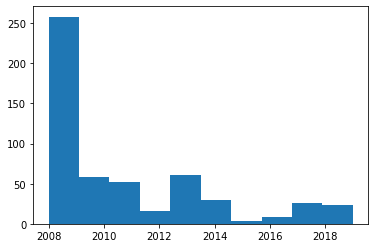

In [42]:
plt.hist(post_years)

In [44]:
import pandas as pd
posts_df = pd.DataFrame(posts)
posts_df

,timestamp,attachments,data,title,tags
0,1562008506,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'This is just too surreal, exciting,...",NaN,NaN
1,1560213848,NaN,[{'post': 'The reading is done! Only took 3 ho...,David Silva updated his status.,NaN
2,1560210300,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'BACK AND READY TO FINISH THIS! Resu...,David Silva was live.,NaN
3,1560198532,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'Reading my dissertation live, no id...",David Silva was live.,NaN
4,1560197281,NaN,[{'post': 'Update: 3:42pm: After 2 hours and 1...,David Silva updated his status.,NaN
...,...,...,...,...,...
531,1213050248,NaN,[{'post': 'is going to MEXICO in 3 days!'}],David Silva updated his status.,NaN
532,1212206744,NaN,[{'post': 'has to work tomorow :('}],David Silva updated his status.,NaN
533,1212127875,NaN,[{'post': 'just got back from climbing! it was...,David Silva updated his status.,NaN
534,1212037617,NaN,[{'post': 'is your leader... do as he says'}],David Silva updated his status.,NaN


In [46]:
posts_df['date'] = [dt.utcfromtimestamp(x) for x in posts_df['timestamp']]
posts_df

,timestamp,attachments,data,title,tags,date
0,1562008506,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'This is just too surreal, exciting,...",NaN,NaN,2019-07-01 19:15:06
1,1560213848,NaN,[{'post': 'The reading is done! Only took 3 ho...,David Silva updated his status.,NaN,2019-06-11 00:44:08
2,1560210300,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'BACK AND READY TO FINISH THIS! Resu...,David Silva was live.,NaN,2019-06-10 23:45:00
3,1560198532,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'Reading my dissertation live, no id...",David Silva was live.,NaN,2019-06-10 20:28:52
4,1560197281,NaN,[{'post': 'Update: 3:42pm: After 2 hours and 1...,David Silva updated his status.,NaN,2019-06-10 20:08:01
...,...,...,...,...,...,...
531,1213050248,NaN,[{'post': 'is going to MEXICO in 3 days!'}],David Silva updated his status.,NaN,2008-06-09 22:24:08
532,1212206744,NaN,[{'post': 'has to work tomorow :('}],David Silva updated his status.,NaN,2008-05-31 04:05:44
533,1212127875,NaN,[{'post': 'just got back from climbing! it was...,David Silva updated his status.,NaN,2008-05-30 06:11:15
534,1212037617,NaN,[{'post': 'is your leader... do as he says'}],David Silva updated his status.,NaN,2008-05-29 05:06:57


In [48]:
posts_df['year'] = [x.year for x in posts_df['date']]
posts_df

,timestamp,attachments,data,title,tags,date,year
0,1562008506,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'This is just too surreal, exciting,...",NaN,NaN,2019-07-01 19:15:06,2019
1,1560213848,NaN,[{'post': 'The reading is done! Only took 3 ho...,David Silva updated his status.,NaN,2019-06-11 00:44:08,2019
2,1560210300,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'BACK AND READY TO FINISH THIS! Resu...,David Silva was live.,NaN,2019-06-10 23:45:00,2019
3,1560198532,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'Reading my dissertation live, no id...",David Silva was live.,NaN,2019-06-10 20:28:52,2019
4,1560197281,NaN,[{'post': 'Update: 3:42pm: After 2 hours and 1...,David Silva updated his status.,NaN,2019-06-10 20:08:01,2019
...,...,...,...,...,...,...,...
531,1213050248,NaN,[{'post': 'is going to MEXICO in 3 days!'}],David Silva updated his status.,NaN,2008-06-09 22:24:08,2008
532,1212206744,NaN,[{'post': 'has to work tomorow :('}],David Silva updated his status.,NaN,2008-05-31 04:05:44,2008
533,1212127875,NaN,[{'post': 'just got back from climbing! it was...,David Silva updated his status.,NaN,2008-05-30 06:11:15,2008
534,1212037617,NaN,[{'post': 'is your leader... do as he says'}],David Silva updated his status.,NaN,2008-05-29 05:06:57,2008


In [51]:
group_df = posts_df.groupby('year').count().sort_values('data', ascending = False)
group_df

,timestamp,attachments,data,title,tags,date
year,,,,,,
2009,182,21,163,178,1,182
2010,58,1,58,57,0,58
2011,52,4,51,49,0,52
2013,61,38,49,26,9,61
2008,76,32,44,76,28,76
2017,26,13,26,23,1,26
2014,30,18,23,12,8,30
2018,12,7,12,9,2,12
2012,16,8,10,8,4,16


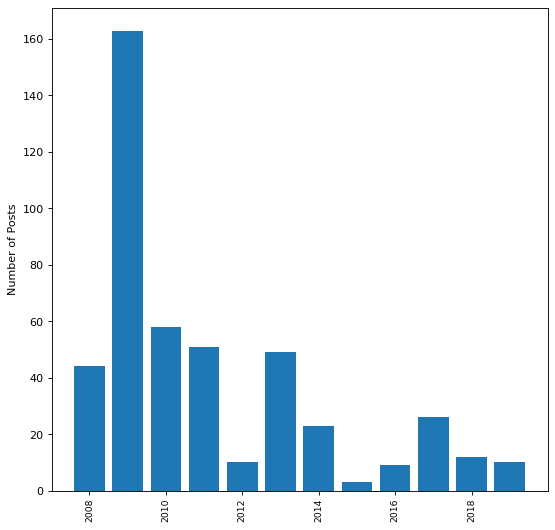

In [60]:
labels = group_df['data'].keys()
vals = group_df['data']
width = .75

fig, ax = plt.subplots(figsize=(8,8), dpi = 80, facecolor ='w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('Number of Posts')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

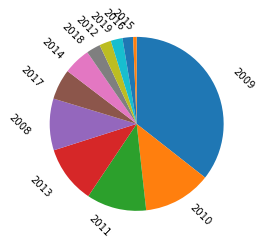

In [61]:
year = range(2008, 2020)
pieplot = plt.pie(x=group_df['data'],
                             labels = group_df['data'].keys(), startangle = 90,
                             counterclock = False, labeldistance = 1.2,
                             textprops = {'rotation': -45})